In [1]:
 run ../util/analyze_sobol.py --ensemble_file ../historical/2021_12_fractures/uq/jib_fractures.csv ../historical/2021_12_fractures/csv/fldmean_ts.csv

The following simulation ids are missing:
   [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 19, 20, 21, 24, 29, 32, 33, 34, 36, 39, 40, 42, 49, 58, 61, 63, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78]
Processing 1980-01-16 12:00:00 (41, 49)
Processing 1980-02-15 12:00:00 (41, 49)
Processing 1980-03-16 12:00:00 (41, 49)
Processing 1980-04-16 00:00:00 (41, 49)
Processing 1980-05-16 12:00:00 (41, 49)
Processing 1980-06-16 00:00:00 (41, 49)
Processing 1980-07-16 12:00:00 (41, 49)
Processing 1980-08-16 12:00:00 (41, 49)
Processing 1980-09-16 00:00:00 (41, 49)
Processing 1980-10-16 12:00:00 (41, 49)
Processing 1980-11-16 00:00:00 (41, 49)
Processing 1980-12-16 12:00:00 (41, 49)
Processing 1981-01-16 12:00:00 (41, 49)
Processing 1981-02-15 00:00:00 (41, 49)
Processing 1981-03-16 12:00:00 (41, 49)
Processing 1981-04-16 00:00:00 (41, 49)
Processing 1981-05-16 12:00:00 (41, 49)
Processing 1981-06-16 00:00:00 (41, 49)
Processing 1981-07-16 12:00:00 (41, 49)
Processing 1981-08-16 12:00:00 (41, 49)
Process

KeyboardInterrupt: 

The following simulation ids are missing:
   [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 19, 20, 21, 24, 29, 32, 33, 34, 36, 39, 40, 42, 49, 58, 61, 63, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78]


/Users/andy/base/crios2pism/util/analyze_csv.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["id"].isin(ids_pass)]["pass"] = True


KeyError: 'Discharge (Gt/yr)'

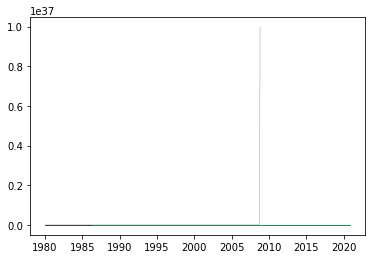

In [175]:
run ../util/analyze_csv.py --smoothing_length 1 --variable "total_grounding_line_flux (Gt year-1)"  --ensemble_file ../historical/2021_12_fractures/uq/jib_fractures.csv ../historical/2021_12_fractures/csv/fldsum_ts.csv


M6
M9
M13
M17
M20


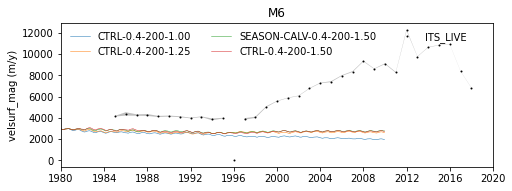

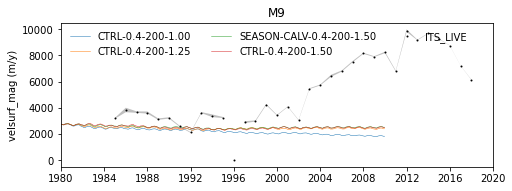

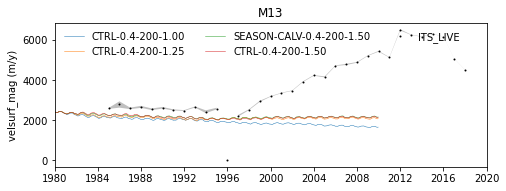

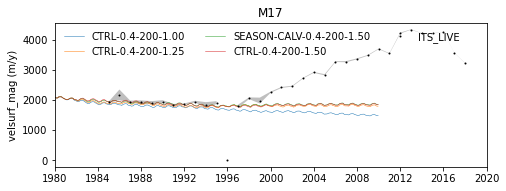

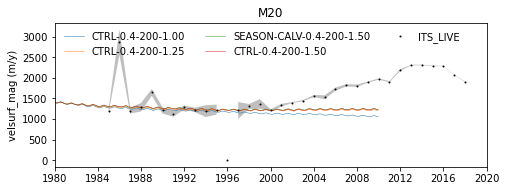

In [262]:
run ../util/plot_timeseries.py --obs_file ../data_sets/velocities/profiles/gps_stations_GRE_G0240_1985_2018.nc ../historical/2021_12_ctrl/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_*


In [248]:
time


<xarray.IndexVariable 'time' (time: 360)>
array(['1980-01-16T12:00:00.000000000', '1980-02-15T12:00:00.000000000',
       '1980-03-16T12:00:00.000000000', ..., '2009-10-16T12:00:00.000000000',
       '2009-11-16T00:00:00.000000000', '2009-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time

In [120]:
for k, col in id_df.iteritems():
    if is_string_dtype(col):
        u = col.unique()
        u.sort()
        v = [k for k, v in enumerate(u)]
        col.replace(to_replace=dict(zip(u, v)), inplace=True)
        
    
    

In [84]:
from pandas.api.types import is_numeric_dtype

In [110]:
u = id_df["frontal_melt_file"].unique()
u.sort()
v = [k for k, v in enumerate(u)]

In [121]:
print(id_df["frontal_melt_file"])

0     9
1     9
2     9
3     9
4     9
     ..
75    5
76    0
77    5
78    5
79    0
Name: frontal_melt_file, Length: 80, dtype: int64


In [115]:
id_df["frontal_melt_file"].replace(to_replace=dict(zip(u, v)))

0     9
1     9
2     9
3     9
4     9
     ..
75    5
76    0
77    5
78    5
79    0
Name: frontal_melt_file, Length: 80, dtype: int64

In [109]:
[k for k, v in enumerate(u)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [113]:
dict(zip(u, v))

{'jib_ocean_forcing_0_1980_2020.nc': 0,
 'jib_ocean_forcing_1_1980_2020.nc': 1,
 'jib_ocean_forcing_2_1980_2020.nc': 2,
 'jib_ocean_forcing_3_1980_2020.nc': 3,
 'jib_ocean_forcing_4_1980_2020.nc': 4,
 'jib_ocean_forcing_5_1980_2020.nc': 5,
 'jib_ocean_forcing_6_1980_2020.nc': 6,
 'jib_ocean_forcing_7_1980_2020.nc': 7,
 'jib_ocean_forcing_8_1980_2020.nc': 8,
 'jib_ocean_forcing_9_1980_2020.nc': 9}

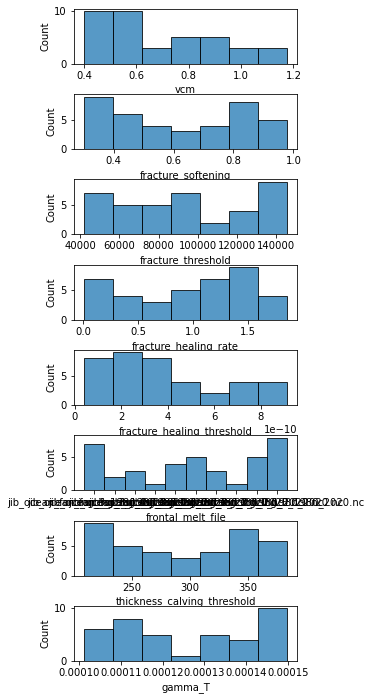

In [219]:
fig, axs = plt.subplots(len(param_names), 1, figsize=[4, 12])
fig.subplots_adjust(hspace=0.55, wspace=0.25)
for k, p_var in enumerate(param_names):
    sns.histplot(data=id_df_missing, x=p_var, stat="count", linewidth=0.8, ax=axs[k])
    ax.set_title(p_var)
    fig.savefig(f"hist_outside_1985.pdf", bbox_inches="tight")


In [252]:
!open *pdf

The following simulation ids are missing:
   [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
  saving to calving_grounding_line_flux (Gt year-1).pdf


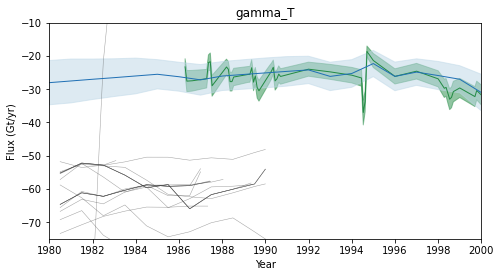

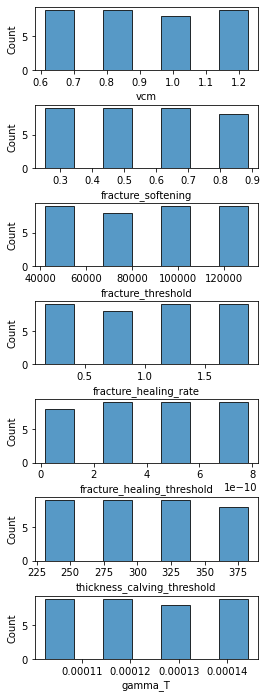

In [284]:
run ../util/analyze_csv.py --smoothing_length 1 --variable "grounding_line_flux (Gt year-1)"  --ensemble_file ../historical/2021_12_fractures_test/uq/jib_fractures_test.csv ../historical/2021_12_fractures_test/csv/scalar_ts.csv

In [233]:
m_df = df.dropna().groupby(by="id").mean().reset_index()


In [263]:
id_df

,id,vcm,fracture_softening,fracture_threshold,fracture_healing_rate,fracture_healing_threshold,thickness_calving_threshold,gamma_T
0,0,0.664795,0.322510,97041.015625,1.353516,2.874707e-10,381.0,0.000102
1,1,1.174561,0.322510,97041.015625,1.353516,2.874707e-10,381.0,0.000102
2,2,0.664795,0.625732,97041.015625,1.353516,2.874707e-10,381.0,0.000102
3,3,0.664795,0.322510,47626.953125,1.353516,2.874707e-10,381.0,0.000102
4,4,0.664795,0.322510,97041.015625,0.169922,2.874707e-10,381.0,0.000102
...,...,...,...,...,...,...,...,...
67,67,0.571045,0.791260,138291.015625,1.419922,4.112207e-10,306.0,0.000134
68,68,0.571045,0.791260,138291.015625,1.103516,3.860840e-10,306.0,0.000134
69,69,0.571045,0.791260,138291.015625,1.103516,4.112207e-10,307.0,0.000134
70,70,0.571045,0.791260,138291.015625,1.103516,4.112207e-10,306.0,0.000100


In [3]:
    mou19_df = pd.read_excel(
        "https://www.pnas.org/highwire/filestream/860129/field_highwire_adjunct_files/2/pnas.1904242116.sd02.xlsx",
        sheet_name="(2) MB_GIS",
        header=8,
        usecols="B,AR:BJ",
        engine="openpyxl",
    )

HTTPError: HTTP Error 403: Forbidden

In [62]:
    mou19_df = pd.read_excel(
        "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
        sheet_name="(5) year_D_R23p2-5.5km",
        header=2,
        usecols="A,P:BJ",
        engine="openpyxl",
    )

In [64]:
mou19_df = mou19_df[mou19_df["NAME"] == "JAKOBSHAVN_ISBRAE"].set_index("NAME").T.rename_axis("Year", axis="columns").rename(columns={"JAKOBSHAVN_ISBRAE": "Discharge (Gt/yr)"})

In [66]:
mou19_df.index -= 0.5

In [169]:
    mou19_df = pd.read_excel(
        "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
        sheet_name="(5) year_D_R23p2-5.5km",
        header=2,
        usecols="A,P:BJ",
        engine="openpyxl",
    )

In [170]:
mou19_df = mou19_df[mou19_df["NAME"] == "JAKOBSHAVN_ISBRAE"].set_index("NAME").T.rename(columns={"JAKOBSHAVN_ISBRAE": "Discharge (Gt/yr)"})
mou19_df.reset_index(inplace=True)
mou19_df["index"] -= 0.5

In [171]:
mou19_dates = pd.to_datetime(mou19_df["index"], format="%Y").drop(columns={"index"})

In [177]:
mou19_discharge = pd.DataFrame(data=mou19_df["Discharge (Gt/yr)"])

In [180]:
mou19_discharge.set_axis(mou19_dates, inplace=True)
mou19_discharge.index.name = "Date"

In [181]:
mou19_discharge

,Discharge (Gt/yr)
Date,
1972-01-01,30.025453
1973-01-01,30.025453
1974-01-01,30.025453
1975-01-01,30.025453
1976-01-01,30.025453
1977-01-01,29.515683
1978-01-01,29.005913
1979-01-01,28.521631
1980-01-01,28.011861


In [214]:
mou19_d = pd.read_excel(
    "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
    sheet_name="(5) year_D_R23p2-5.5km",
    header=2,
    usecols="A,P:BJ",
    engine="openpyxl",
)
mou19_d = (
    mou19_d[mou19_d["NAME"] == "JAKOBSHAVN_ISBRAE"]
    .set_index("NAME")
    .T.rename(columns={"JAKOBSHAVN_ISBRAE": "Discharge (Gt/yr)"})
)
mou19_d_err = pd.read_excel(
    "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
    sheet_name="(5) year_D_R23p2-5.5km",
    header=2,
    usecols="A,BN:DH",
    engine="openpyxl",
)
mou19_d_err = (
    mou19_d_err[mou19_d_err["NAME"] == "JAKOBSHAVN_ISBRAE"]
    .set_index("NAME")
    .T.rename(columns={"JAKOBSHAVN_ISBRAE": "Discharge uncertainty (Gt/yr)"})
)

mou19_d.reset_index(inplace=True)
mou19_d_err.reset_index(inplace=True)
mou19_d_err.astype({"index": float})


ValueError: could not convert string to float: '1972.5.1'

In [218]:
mou19_d_err = pd.read_excel(
    "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
    sheet_name="(5) year_D_R23p2-5.5km",
    header=2,
    usecols="A,BN:DH",
    engine="openpyxl",
    dtype="float"
)


ValueError: Unable to convert column NAME to type float64

In [220]:
mou19_d = pd.read_excel(
    "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
    sheet_name="(5) year_D_R23p2-5.5km",
    header=2,
    usecols="A,P:BJ",
    engine="openpyxl",
)
mou19_d = (
    mou19_d[mou19_d["NAME"] == "JAKOBSHAVN_ISBRAE"]
    .set_index("NAME")
    .T.rename(columns={"JAKOBSHAVN_ISBRAE": "Discharge (Gt/yr)"})
)
mou19_d_err = pd.read_excel(
    "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
    sheet_name="(5) year_D_R23p2-5.5km",
    header=2,
    usecols="A,BN:DH",
    engine="openpyxl",
)
mou19_d_err = (
    mou19_d_err[mou19_d_err["NAME"] == "JAKOBSHAVN_ISBRAE"]
    .set_index("NAME")
    .T.rename(columns={"JAKOBSHAVN_ISBRAE": "Discharge uncertainty (Gt/yr)"})
)
mou19_d.reset_index(inplace=True)
mou19_d_err.reset_index(inplace=True)


In [235]:
mou19_d = pd.read_excel(
    "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
    sheet_name="(5) year_D_R23p2-5.5km",
    header=2,
    usecols="A,P:BJ",
    engine="openpyxl",
)


In [241]:
mou19_d.iloc[:, 0]

0                     SW_NONAME1
1           ILORLIIT-SERMINNGUAQ
2                       SERMILIK
3             QAJUUTTAP_SERMIA_N
4       SIORALIK-ARSUK-QIPISAQQU
                  ...           
2065                         NaN
2066                         NaN
2067                         NaN
2068                         NaN
2069                         NaN
Name: NAME, Length: 2070, dtype: object

In [260]:
mou19_d = pd.read_excel(
    "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
    sheet_name="(5) year_D_R23p2-5.5km",
    header=2,
    usecols="A,P:BJ",
    engine="openpyxl",
)
mou19_d_err = pd.read_excel(
    "/Users/andy/Google Drive/My Drive/data/mouginot_discharge/pnas.1904242116.sd02.xlsx",
    sheet_name="(5) year_D_R23p2-5.5km",
    header=2,
    usecols="A,BN:DH",
    engine="openpyxl",
)


In [261]:
mou19_d = mou19_d[mou19_d["NAME"] == "JAKOBSHAVN_ISBRAE"].drop(columns={"NAME"})
mou19_d_err = mou19_d_err[mou19_d_err["NAME"] == "JAKOBSHAVN_ISBRAE"].drop(columns={"NAME"})
years = mou19_d.columns.astype("float").values - 0.5
d = mou19_d.values.T
d_err = mou19_d_err.values.T

In [275]:
D = pd.DataFrame(data=d, index=years.astype(int), columns={"Discharge (Gt/yr)"})
D_err = pd.DataFrame(data=d_err, index=years.astype(int), columns={"Discharge uncertainty (Gt/yr)"})

In [280]:
mou19 = pd.merge(D, D_err, left_index=True, right_index=True)
mou19_dates = pd.to_datetime(mou19.index, format="%Y")
mou19.set_index(mou19_dates, inplace=True)

In [281]:
mou19

,Discharge (Gt/yr),Discharge uncertainty (Gt/yr)
1972-01-01,30.025453,9.272591
1973-01-01,30.025453,7.972775
1974-01-01,30.025453,6.851423
1975-01-01,30.025453,6.035964
1976-01-01,30.025453,5.730196
1977-01-01,29.515683,5.751745
1978-01-01,29.005913,5.951668
1979-01-01,28.521631,6.256286
1980-01-01,28.011861,6.660119
1981-01-01,27.502091,6.605237


In [274]:
years.astype(int)

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])